In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

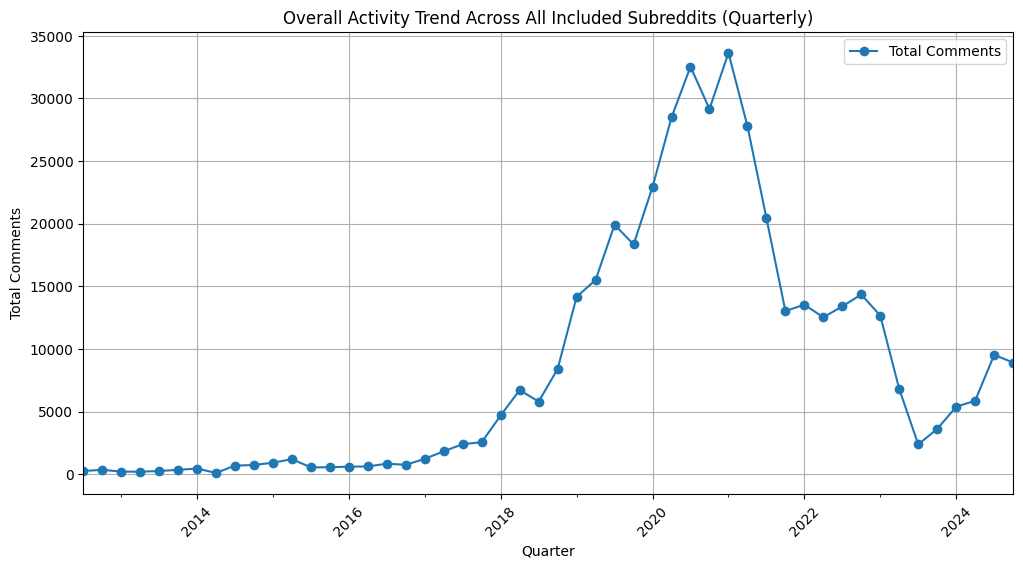

In [6]:
# Load the dataset
df = pd.read_csv("b_conventional_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

df = df[df["created_utc"] < "2025-01-01"]

# Set time granularity to quarterly
df["quarter"] = df["created_utc"].dt.to_period("Q")

# Aggregate the total number of comments per quarter across all subreddits
activity_trend = df.groupby("quarter").size()

# Plot the overall trend
plt.figure(figsize=(12, 6))
activity_trend.plot(kind="line", marker="o", label="Total Comments")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Quarter")
plt.ylabel("Total Comments")
plt.title("Overall Activity Trend Across All Included Subreddits (Quarterly)")
plt.grid(True)
plt.legend()
plt.show()


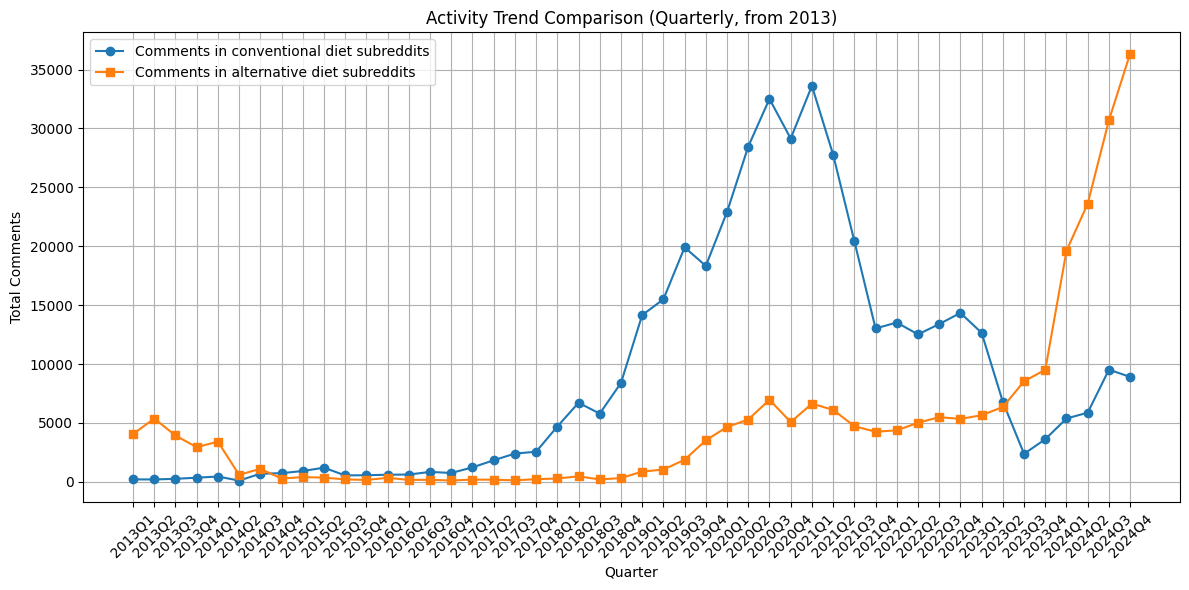

In [16]:
# Load datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")  # Unix timestamp
df2["created_utc"] = pd.to_datetime(df2["created_utc"])            # already in datetime format

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Extract quarters
df1["quarter"] = df1["created_utc"].dt.to_period("Q")
df2["quarter"] = df2["created_utc"].dt.to_period("Q")

# Group by quarter
trend1 = df1.groupby("quarter").size()
trend2 = df2.groupby("quarter").size()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(trend1.index.astype(str), trend1.values, marker="o", label="Comments in conventional diet subreddits")
plt.plot(trend2.index.astype(str), trend2.values, marker="s", label="Comments in alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Quarter")
plt.ylabel("Total Comments")
plt.title("Activity Trend Comparison (Quarterly, from 2013)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
# Display all unique subreddits
df = pd.read_csv("b_conventional_comments.csv")
unique_subreddits = df["subreddit"].unique()
print(unique_subreddits)

['nutrition' 'keto' 'HealthyFood' 'intermittentfasting' 'fasting'
 'PlantBasedDiet' 'Volumeeating' 'EatCheapAndHealthy' 'CICO' 'vegetarian']


In [15]:
# Display all unique subreddits
df = pd.read_csv("cleaned_comments.csv")
unique_subreddits = df["subreddit"].unique()
print(unique_subreddits)

['carnivorediet' 'CarnivoreForum' 'SaturatedFat' 'StopEatingSeedOils'
 'NutritionalPsychiatry' 'ScientificNutrition' 'AntiVegan'
 'DietitiansSaidWhatNow' 'raypeat' 'Paleo']


In [17]:
# Load the dataset
df = pd.read_csv("b_conventional_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Extract the year
df["year"] = df["created_utc"].dt.year

# Count total comments per year
yearly_counts = df["year"].value_counts().sort_index()

# Get the number of comments for 2020 and 2024
comments_2020 = yearly_counts.get(2020, 0)
comments_2024 = yearly_counts.get(2024, 0)

# Calculate percentage increase
if comments_2020 > 0:
    percentage_increase = ((comments_2024 - comments_2020) / comments_2020) * 100
else:
    percentage_increase = None  # Avoid division by zero

# Print result
print(f"Comments in 2020: {comments_2020}")
print(f"Comments in 2024: {comments_2024}")

Comments in 2020: 113047
Comments in 2024: 29667


In [42]:
if percentage_increase is not None:
    print(f"Percentage increase from 2020 to 2024: {percentage_increase:.2f}%")
else:
    print("Cannot calculate percentage increase (no comments in 2020).")

Percentage increase from 2020 to 2024: 401.92%


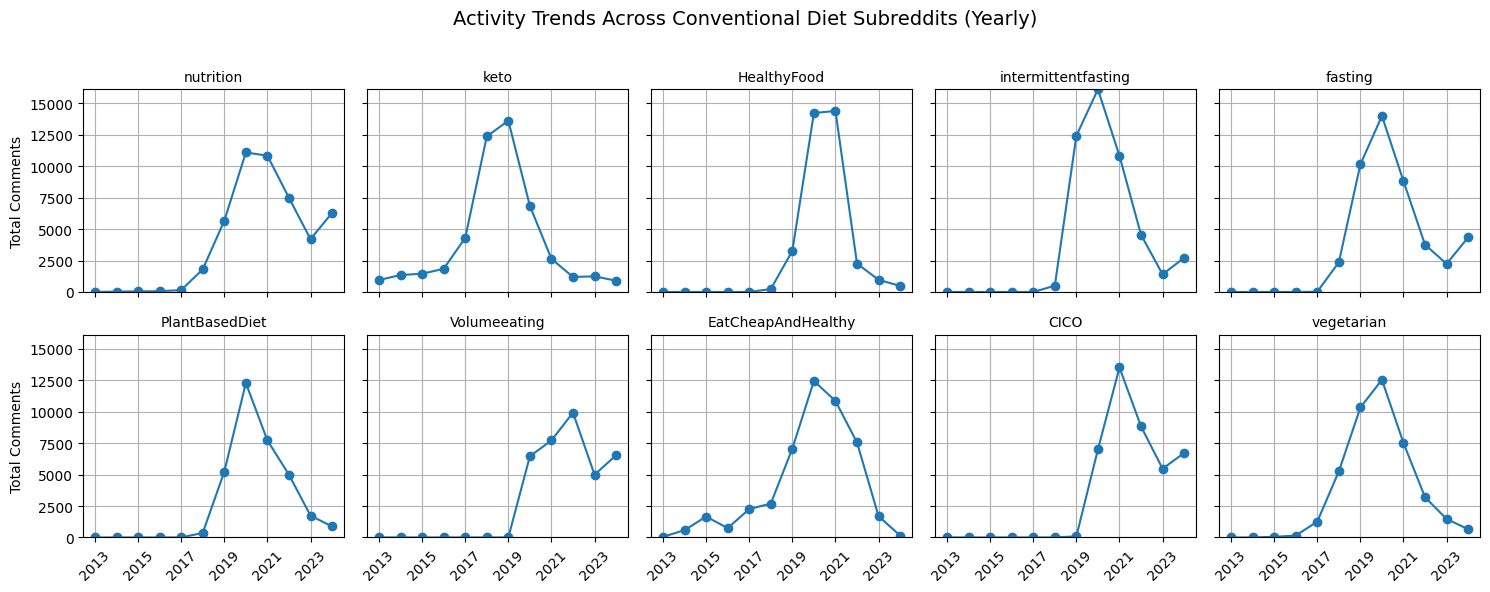

In [21]:
# Load the dataset
df = pd.read_csv("b_conventional_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")

# Get unique subreddits
subreddits = df["subreddit"].unique()

# Ensure all subreddits have the same date range
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Create subplot grid (adjust rows/columns dynamically)
n_subreddits = len(subreddits)
n_cols = 5  # Number of columns
n_rows = -(-n_subreddits // n_cols)  # Ceiling division for rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3), sharex=True, sharey=True)

# Flatten axes array
axes = axes.flatten()

# Get global y-axis limits
all_counts = df.groupby(["subreddit", "year"]).size()
y_max = all_counts.max()

# Plot each subreddit's activity trend
for i, subreddit in enumerate(subreddits):
    ax = axes[i]
    df_filtered = df[df["subreddit"] == subreddit]
    activity_trend = df_filtered.groupby("year").size().reindex(full_range, fill_value=0)

    ax.plot(activity_trend.index.astype(str), activity_trend, marker="o", linestyle="-")
    ax.set_title(subreddit, fontsize=10)
    
    # Only set y-label for the first column of each row
    if i % n_cols == 0:
        ax.set_ylabel("Total Comments")
        
    ax.set_ylim(0, y_max)
    ax.grid(True)

    # Set x-axis labels
    every_other_year = range(0, len(full_range), 2)
    ax.set_xticks(every_other_year)
    ax.set_xticklabels(full_range[every_other_year].astype(str), rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Activity Trends Across Conventional Diet Subreddits (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


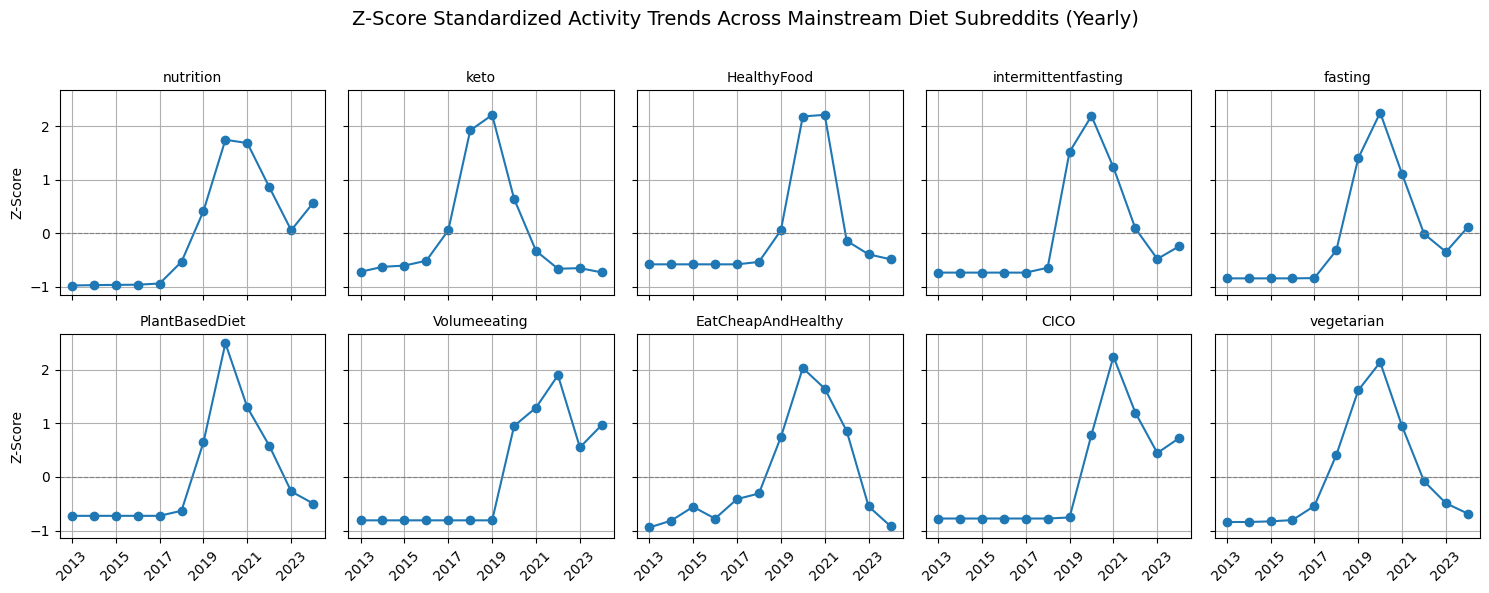

In [3]:
from scipy.stats import zscore

# Load the dataset
df = pd.read_csv("b_conventional_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

# Filter dates between Jan 1, 2013 and Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df = df[(df["created_utc"] >= start_date) & (df["created_utc"] < end_date)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")

# Get unique subreddits
subreddits = df["subreddit"].unique()

# Ensure all subreddits have the same date range
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Create subplot grid (adjust rows/columns dynamically)
n_subreddits = len(subreddits)
n_cols = 5  # Number of columns
n_rows = -(-n_subreddits // n_cols)  # Ceiling division for rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3), sharex=True, sharey=True)

# Flatten axes array
axes = axes.flatten()

# Plot each subreddit's activity trend
for i, subreddit in enumerate(subreddits):
    ax = axes[i]
    df_filtered = df[df["subreddit"] == subreddit]
    activity_trend = df_filtered.groupby("year").size().reindex(full_range, fill_value=0)
    
    # Z-score normalization
    activity_trend_z = zscore(activity_trend)

    # Plot Z-score standardized activity trend
    ax.plot(full_range.astype(str), activity_trend_z, marker="o", linestyle="-")
    ax.set_title(subreddit, fontsize=10)
    
    # Only set y-label for the first column of each row
    if i % n_cols == 0:
        ax.set_ylabel("Z-Score")
        
    ax.axhline(0, color="gray", linestyle="--", linewidth=0.8)  # Add a reference line at Z=0
    ax.grid(True)

    # Set x-axis labels
    every_other_year = range(0, len(full_range), 2)
    ax.set_xticks(every_other_year)
    ax.set_xticklabels(full_range[every_other_year].astype(str), rotation=45)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Z-Score Standardized Activity Trends Across Mainstream Diet Subreddits (Yearly)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\3390970949.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\3390970949.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


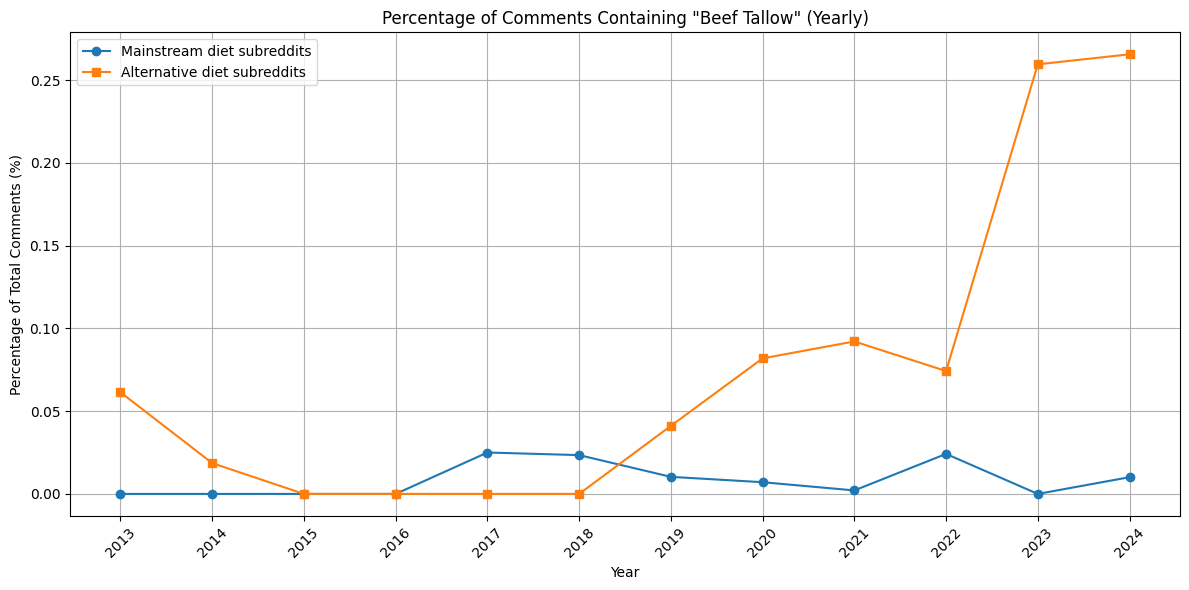

In [23]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"])

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("beef tallow", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("beef tallow", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Beef Tallow" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\1868913342.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\1868913342.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


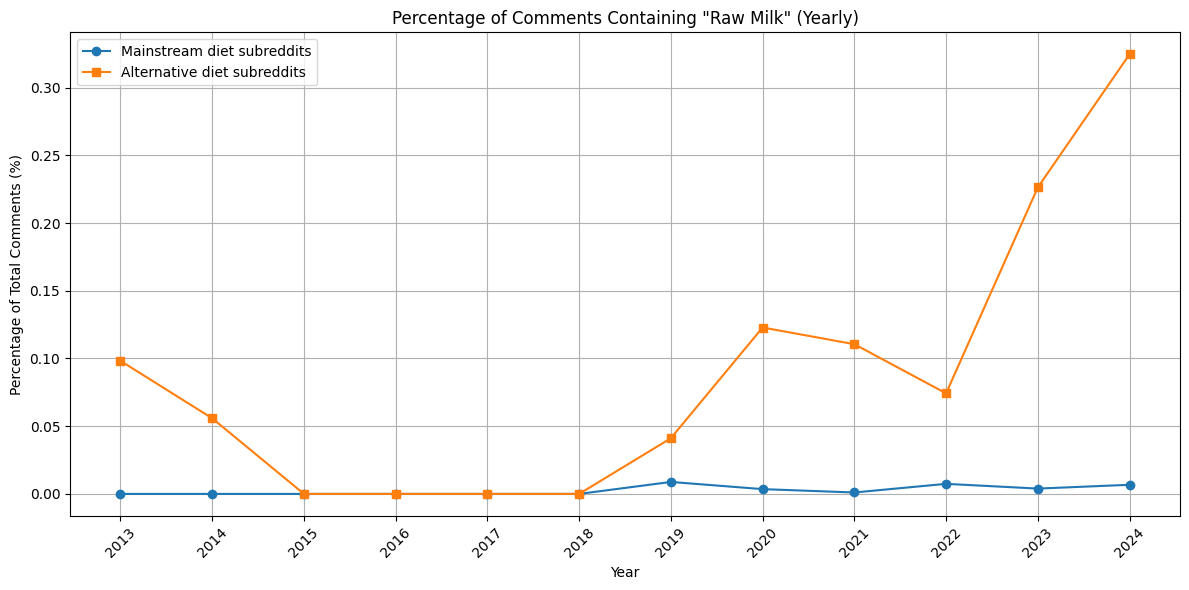

In [24]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"])

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("raw milk", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("raw milk", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Raw Milk" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\552626421.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
C:\Users\Arvin\AppData\Local\Temp\ipykernel_23176\552626421.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")


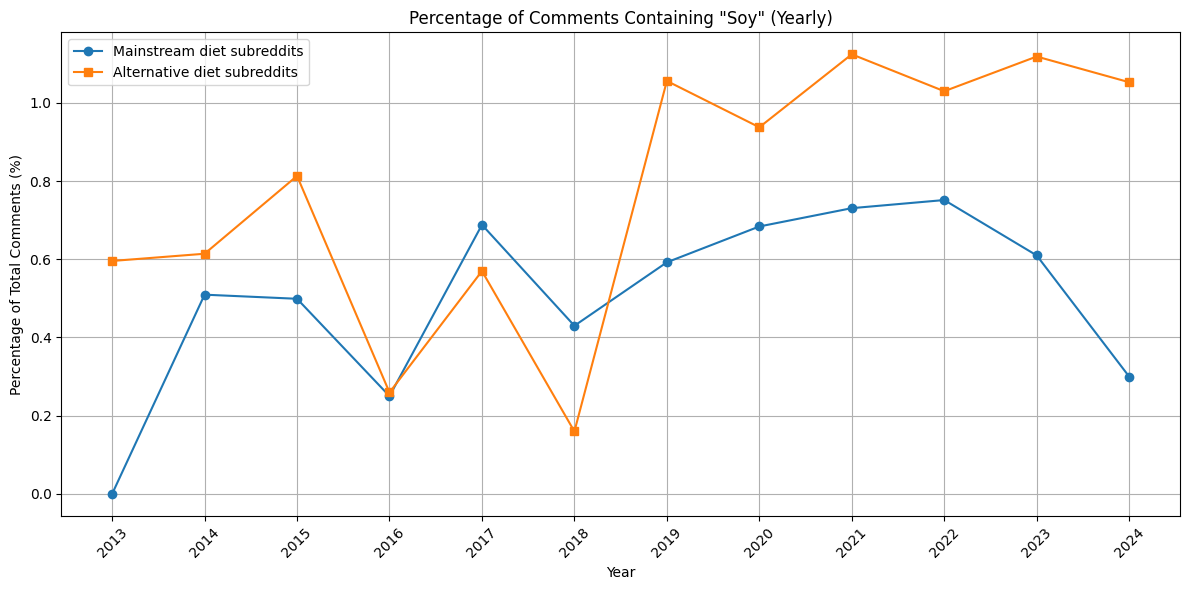

In [25]:
# Load both datasets
df1 = pd.read_csv("b_conventional_comments.csv")
df2 = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc'
df1["created_utc"] = pd.to_datetime(df1["created_utc"], unit="s")
df2["created_utc"] = pd.to_datetime(df2["created_utc"])

# Filter date range: Jan 1, 2013 to before Jan 1, 2025
start_date = "2013-01-01"
end_date = "2025-01-01"
df1 = df1[(df1["created_utc"] >= start_date) & (df1["created_utc"] < end_date)]
df2 = df2[(df2["created_utc"] >= start_date) & (df2["created_utc"] < end_date)]

# Filter for "beef tallow" mentions
df1_beef = df1[df1["body"].str.contains("soy", case=False, na=False)]
df2_beef = df2[df2["body"].str.contains("soy", case=False, na=False)]

# Add 'year' column
df1["year"] = df1["created_utc"].dt.to_period("Y")
df2["year"] = df2["created_utc"].dt.to_period("Y")
df1_beef["year"] = df1_beef["created_utc"].dt.to_period("Y")
df2_beef["year"] = df2_beef["created_utc"].dt.to_period("Y")

# Define full year range
full_range = pd.period_range("2013", "2024", freq="Y")

# Aggregate total and beef tallow comment counts
total1 = df1.groupby("year").size().reindex(full_range, fill_value=0)
total2 = df2.groupby("year").size().reindex(full_range, fill_value=0)
beef1 = df1_beef.groupby("year").size().reindex(full_range, fill_value=0)
beef2 = df2_beef.groupby("year").size().reindex(full_range, fill_value=0)

# Compute percentages
pct1 = (beef1 / total1) * 100
pct2 = (beef2 / total2) * 100

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pct1.index.astype(str), pct1, marker="o", linestyle="-", label="Mainstream diet subreddits")
plt.plot(pct2.index.astype(str), pct2, marker="s", linestyle="-", label="Alternative diet subreddits")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Soy" (Yearly)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\2169762025.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


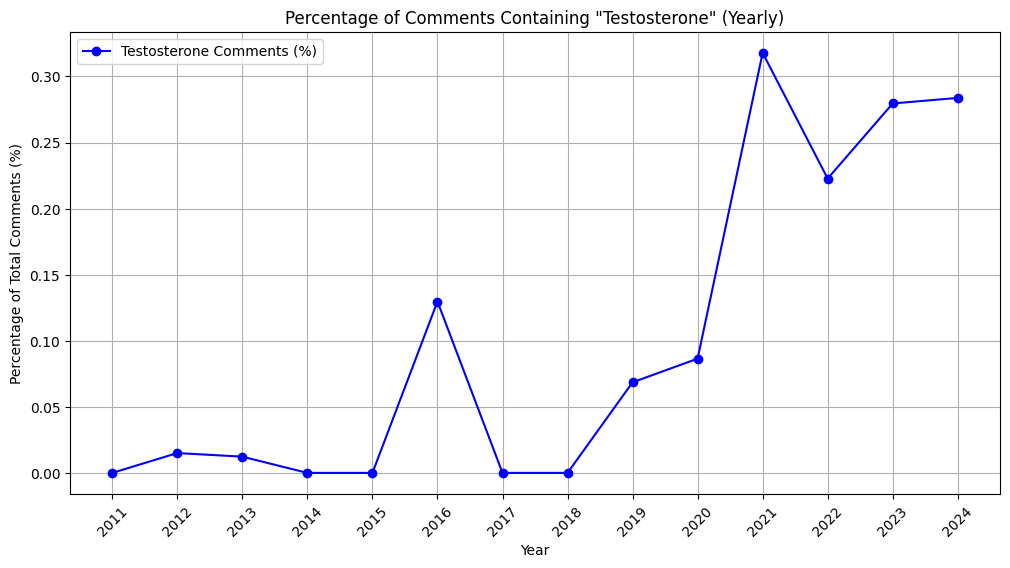

In [32]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("testosterone", case=False, na=False)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Aggregate the total number of all comments and beef tallow comments per year
total_comments_per_year = df.groupby("year").size().reindex(full_range, fill_value=0)
beef_tallow_comments_per_year = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Calculate percentage of beef tallow comments relative to all comments
percentage_beef_tallow = (beef_tallow_comments_per_year / total_comments_per_year) * 100

# Plot the overall trend as percentage
plt.figure(figsize=(12, 6))
plt.plot(percentage_beef_tallow.index.astype(str), percentage_beef_tallow, marker="o", linestyle="-", color="b", label='Testosterone Comments (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Testosterone" (Yearly)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\3291730367.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


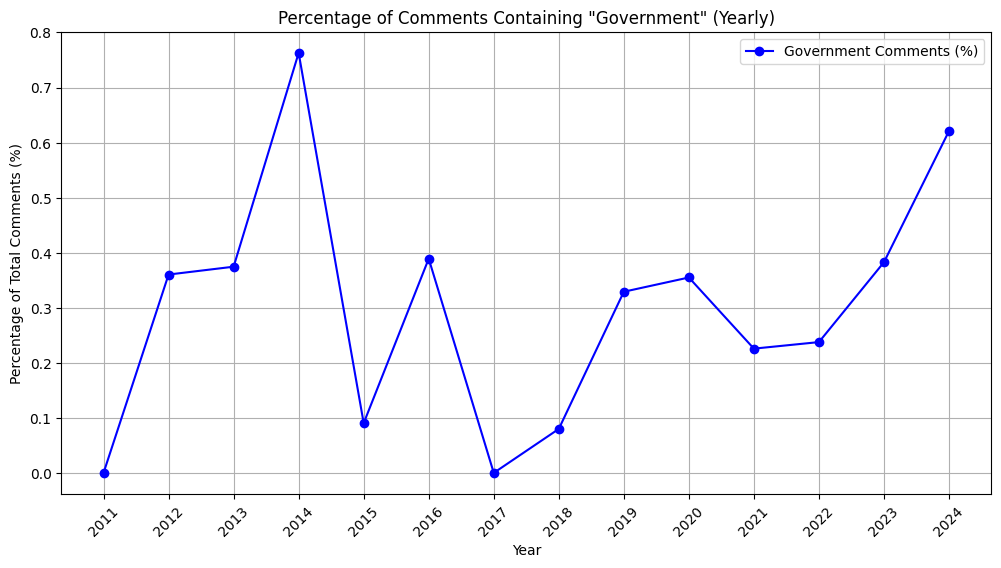

In [33]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("government", case=False, na=False)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Aggregate the total number of all comments and beef tallow comments per year
total_comments_per_year = df.groupby("year").size().reindex(full_range, fill_value=0)
beef_tallow_comments_per_year = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Calculate percentage of beef tallow comments relative to all comments
percentage_beef_tallow = (beef_tallow_comments_per_year / total_comments_per_year) * 100

# Plot the overall trend as percentage
plt.figure(figsize=(12, 6))
plt.plot(percentage_beef_tallow.index.astype(str), percentage_beef_tallow, marker="o", linestyle="-", color="b", label='Government Comments (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Government" (Yearly)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\3043624005.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


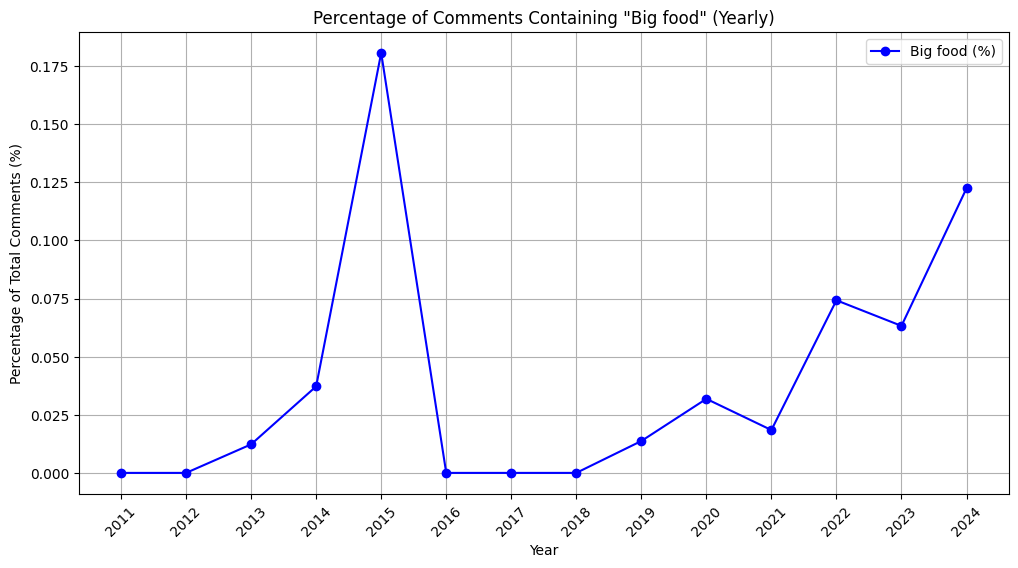

In [34]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("big food", case=False, na=False)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Aggregate the total number of all comments and beef tallow comments per year
total_comments_per_year = df.groupby("year").size().reindex(full_range, fill_value=0)
beef_tallow_comments_per_year = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Calculate percentage of beef tallow comments relative to all comments
percentage_beef_tallow = (beef_tallow_comments_per_year / total_comments_per_year) * 100

# Plot the overall trend as percentage
plt.figure(figsize=(12, 6))
plt.plot(percentage_beef_tallow.index.astype(str), percentage_beef_tallow, marker="o", linestyle="-", color="b", label='Big food (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Big food" (Yearly)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\4139808190.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


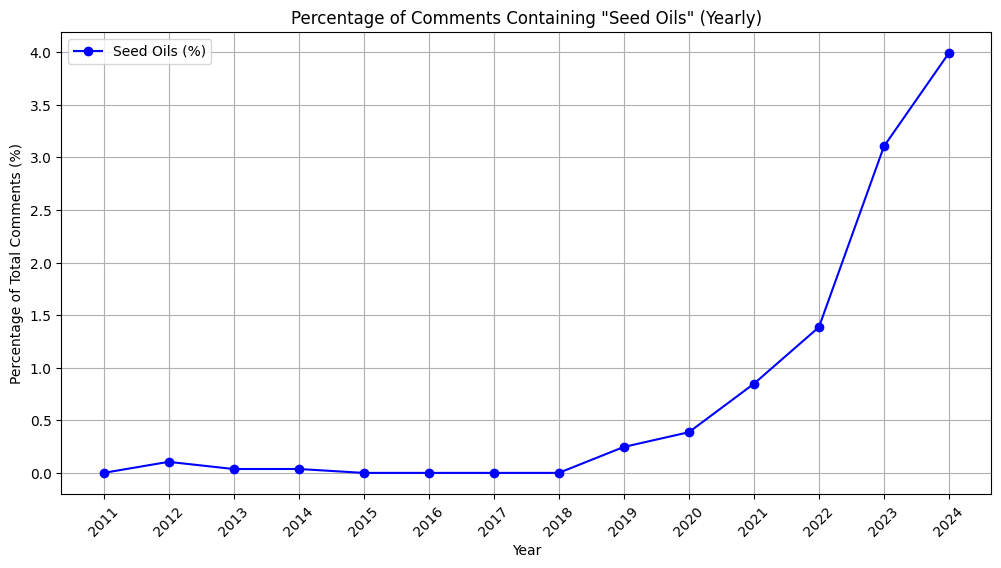

In [35]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("seed oils", case=False, na=False)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Aggregate the total number of all comments and beef tallow comments per year
total_comments_per_year = df.groupby("year").size().reindex(full_range, fill_value=0)
beef_tallow_comments_per_year = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Calculate percentage of beef tallow comments relative to all comments
percentage_beef_tallow = (beef_tallow_comments_per_year / total_comments_per_year) * 100

# Plot the overall trend as percentage
plt.figure(figsize=(12, 6))
plt.plot(percentage_beef_tallow.index.astype(str), percentage_beef_tallow, marker="o", linestyle="-", color="b", label='Seed Oils (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Seed Oils" (Yearly)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\3531327976.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


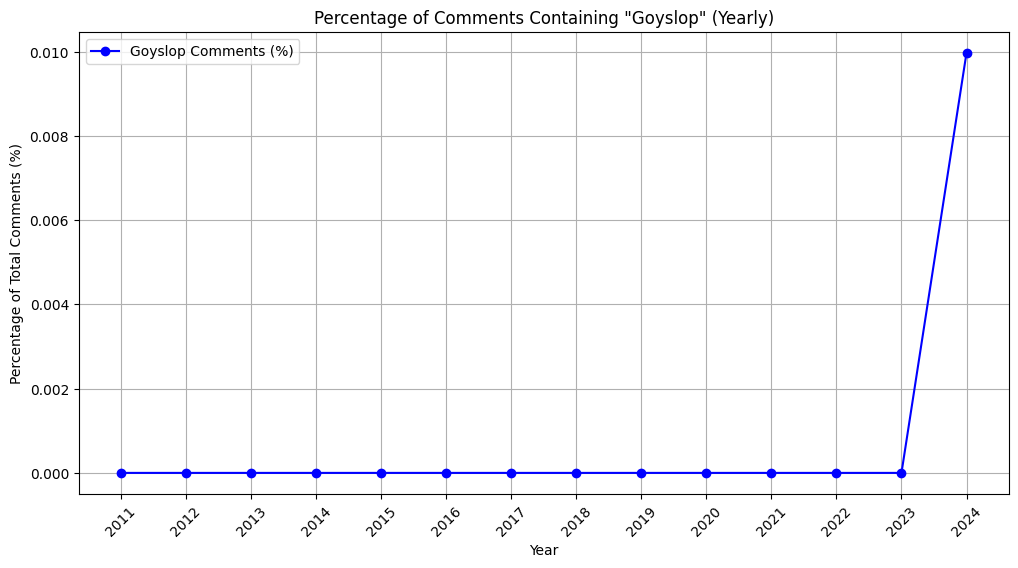

In [48]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("goyslop", case=False, na=False)]

# Set time granularity to yearly
df["year"] = df["created_utc"].dt.to_period("Y")
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df["year"].min(), df["year"].max(), freq="Y")

# Aggregate the total number of all comments and beef tallow comments per year
total_comments_per_year = df.groupby("year").size().reindex(full_range, fill_value=0)
beef_tallow_comments_per_year = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Calculate percentage of beef tallow comments relative to all comments
percentage_beef_tallow = (beef_tallow_comments_per_year / total_comments_per_year) * 100

# Plot the overall trend as percentage
plt.figure(figsize=(12, 6))
plt.plot(percentage_beef_tallow.index.astype(str), percentage_beef_tallow, marker="o", linestyle="-", color="b", label='Goyslop Comments (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Percentage of Total Comments (%)")
plt.title('Percentage of Comments Containing "Goyslop" (Yearly)')
plt.grid(True)
plt.legend()
plt.show()


C:\Users\Arvin\AppData\Local\Temp\ipykernel_21560\3054977968.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")


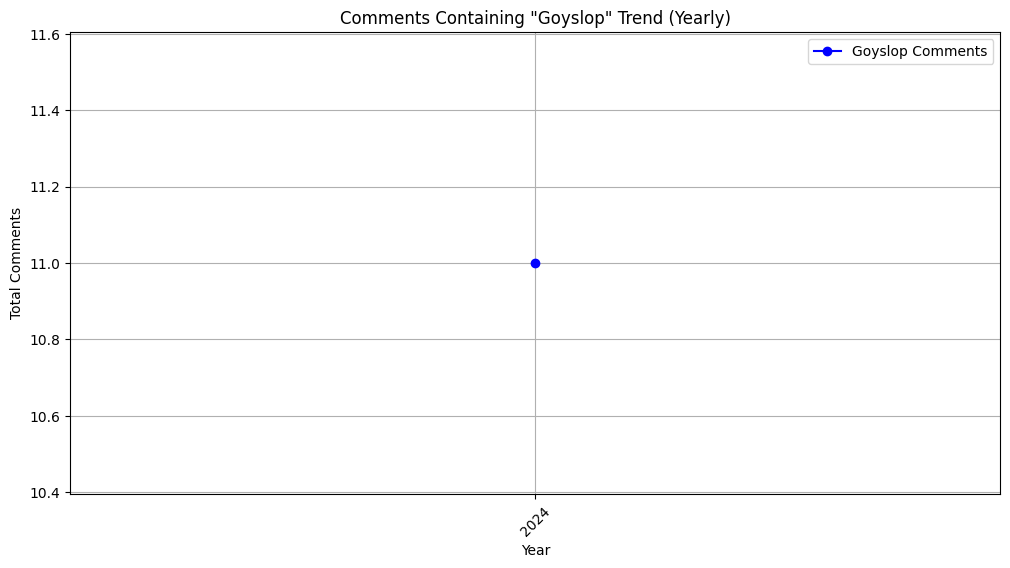

In [49]:
# Load the dataset
df = pd.read_csv("cleaned_comments.csv")

# Convert 'created_utc' to datetime
df["created_utc"] = pd.to_datetime(df["created_utc"])

# Filter out data from (and including) Jan 1st, 2025
df = df[df["created_utc"] < "2025-01-01"]

# Filter comments containing the phrase "beef tallow"
df_beef_tallow = df[df["body"].str.contains("Goyslop", case=False, na=False)]

# Set time granularity to yearly
df_beef_tallow["year"] = df_beef_tallow["created_utc"].dt.to_period("Y")

# Ensure the same date range for all data
full_range = pd.period_range(df_beef_tallow["year"].min(), df_beef_tallow["year"].max(), freq="Y")

# Aggregate the total number of comments containing "beef tallow" per year
activity_trend = df_beef_tallow.groupby("year").size().reindex(full_range, fill_value=0)

# Plot the overall trend
plt.figure(figsize=(12, 6))
plt.plot(activity_trend.index.astype(str), activity_trend, marker="o", linestyle="-", color="b", label="Goyslop Comments")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel("Year")
plt.ylabel("Total Comments")
plt.title('Comments Containing "Goyslop" Trend (Yearly)')
plt.grid(True)
plt.legend()
plt.show()
